### Gradient Calculation With Autograd

In [36]:
import torch
import torch.nn as nn

In [3]:
x= torch.rand(3,requires_grad=True)
print(x)

tensor([0.3895, 0.4486, 0.8160], requires_grad=True)


In [4]:
y=x+2
print(y)

tensor([2.3895, 2.4486, 2.8160], grad_fn=<AddBackward0>)


In [11]:
z= y*y*2
#z=z.mean()
print(z)

tensor([11.4195, 11.9917, 15.8597], grad_fn=<MulBackward0>)


In [12]:
v= torch.tensor([0.1,1.0,0.001],dtype = torch.float32)
z.backward(v)
print(x.grad)

tensor([ 4.1418, 13.0595,  3.7659])


In [16]:
#x.requires_grad_(False)
#x.detach
#with torch.no_grad():

with torch.no_grad():
    y= x+2
    print(y)

tensor([2.3895, 2.4486, 2.8160])


In [20]:
wights =torch.ones(4, requires_grad= True)

for epoch in range(3):
    model_output = (wights*3).sum()
    model_output.backward()
    print(wights.grad)
    
    wights.grad.zero_()
    

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


In [ ]:
optimizer = torch.optim.SGD(wights,lr=0.01)
optimizer.step()
optimizer.zero_grad()

### Backpropagation

In [24]:
x=torch.tensor(1.0)
y=torch.tensor(2.0)
w=torch.tensor(1.0,requires_grad=True)

# forward pass and compute the loss

y_hat=w*x

loss = (y_hat-y)**2

print(loss)

# backward pass

loss.backward()
print(w.grad)

# update wights
# next forward and backwards


tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


### Gradient Descent with Autograd and Backpropagation

In [35]:
import numpy as np

# f = w * x

# f = 2 * x

X= torch.tensor([1,2,3,4],dtype=torch.float32)
Y= torch.tensor([2,4,6,8],dtype=torch.float32)

w=torch.tensor(0.0,dtype=torch.float32, requires_grad=True)

# model prediction

def forward(x):
    return w*x


# loss = Mse
def loss(y,y_predicted):
    return((y_predicted-y)**2).mean()



print(f'Prediction befor training: f(5)={forward(5):.3f}')

# Training 

learning_rate =0.01
n_iters =100

for epoch in range(n_iters):
    
    # prediction = forward pass
    y_pred = forward(X)
    
    # loss
    l = loss(Y,y_pred)
    
    # gradient = backward pass
    l.backward()
    
    # update weights
    with torch.no_grad():
        w -= learning_rate*w.grad
    w.grad.zero_()
    
    if epoch % 10==0:
        print(f'epoch {epoch+1}: w={w:.3f},loss={l:8f}')
print(f'prediction after training :f(5)={forward(5):.3f}')

Prediction befor training: f(5)=0.000
epoch 1: w=0.300,loss=30.000000
epoch 11: w=1.665,loss=1.162786
epoch 21: w=1.934,loss=0.045069
epoch 31: w=1.987,loss=0.001747
epoch 41: w=1.997,loss=0.000068
epoch 51: w=1.999,loss=0.000003
epoch 61: w=2.000,loss=0.000000
epoch 71: w=2.000,loss=0.000000
epoch 81: w=2.000,loss=0.000000
epoch 91: w=2.000,loss=0.000000
prediction after training :f(5)=10.000


### Training Pipeline: Model, Loss, and Optimizer

In [46]:
import numpy as np

# f = w * x

# f = 2 * x

X= torch.tensor([[1],[2],[3],[4]],dtype=torch.float32)
Y= torch.tensor([[2],[4],[6],[8]],dtype=torch.float32)

X_test = torch.tensor([5],dtype=torch.float32)

n_samples,n_features = X.shape
print(n_samples,n_features)

input_size=n_features
output_size=n_features


#model =nn.Linear(input_size,output_size)

class LinearRegression(nn.Module):
    
    def __init__(self,input_dim,output_dim):
        
        super(LinearRegression,self).__init__()
        
        # define layers
        self.lin =nn.Linear(input_dim,output_dim)
    def forward(self,x):
        return self.lin(x)
              
model = LinearRegression(input_size,output_size)



print(f'Prediction befor training: f(5)={model(X_test).item():.3f}')

# Training 

learning_rate =0.01
n_iters =100

loss =nn.MSELoss()
optimiser=torch.optim.SGD(model.parameters(),lr=learning_rate)

for epoch in range(n_iters):
    
    # prediction = forward pass
    y_pred = model(X)
    
    # loss
    l = loss(Y,y_pred)
    
    # gradient = backward pass
    l.backward()
    
    # update weights
    optimiser.step()
    
    optimiser.zero_grad()
    
    if epoch % 10==0:
        [w,b]=model.parameters()
        print(f'epoch {epoch+1}: w={w[0][0].item():.3f},loss={l:8f}')
print(f'prediction after training :f(5)={model(X_test).item():.3f}')

4 1
Prediction befor training: f(5)=0.873
epoch 1: w=0.400,loss=24.201897
epoch 11: w=1.532,loss=0.716328
epoch 21: w=1.720,loss=0.103452
epoch 31: w=1.756,loss=0.082653
epoch 41: w=1.768,loss=0.077460
epoch 51: w=1.776,loss=0.072941
epoch 61: w=1.782,loss=0.068696
epoch 71: w=1.789,loss=0.064697
epoch 81: w=1.795,loss=0.060931
epoch 91: w=1.801,loss=0.057385
prediction after training :f(5)=9.601


###  Linear Regression

In [58]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

##### 0) prepar data
##### 1) Model
##### 2) loss and optimizer
##### 3) training loop

#### Prepar Dataset

In [53]:
X_numpy , y_numpy = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1)
X=torch.from_numpy(X_numpy.astype(np.float32))
y=torch.from_numpy(y_numpy.astype(np.float32))
y=y.view(y.shape[0],1)

n_samples,n_features = X.shape

#### Model 

In [54]:
input_size =n_features
output_size =1
model = nn.Linear(input_size,output_size)

#### Loss and Optimizer 

In [55]:
learning_rate =0.01
criterion = nn.MSELoss()
optimiser =torch.optim.SGD(model.parameters(),lr=learning_rate)


#### Traning Loop

epoch: 10,loss=4399.1846
epoch: 20,loss=3281.4490
epoch: 30,loss=2472.8616
epoch: 40,loss=1887.2847
epoch: 50,loss=1462.7872
epoch: 60,loss=1154.7733
epoch: 70,loss=931.0892
epoch: 80,loss=768.5183
epoch: 90,loss=650.2781
epoch: 100,loss=564.2230


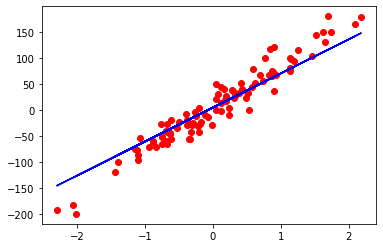

In [57]:
num_epochs = 100

for epoch in range(num_epochs):
    
    # forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted,y)
    
    # backward pass
    loss.backward()
    #update 
    optimiser.step()
    optimiser.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1},loss={loss.item():.4f}')
        
#Plot
predicted =model(X).detach().numpy()
plt.plot(X_numpy,y_numpy,'ro')
plt.plot(X_numpy,predicted,'b')
plt.show()

###  Logistic Regression

In [59]:
bc = datasets.load_breast_cancer()
X,y =bc.data ,bc.target
n_samples ,n_features = X.shape
print(n_samples,n_features)

569 30


In [60]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=1234)
sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test =sc.transform(X_test)

X_train =torch.from_numpy(X_train.astype(np.float32))
X_test =torch.from_numpy(X_test.astype(np.float32))
y_train =torch.from_numpy(y_train.astype(np.float32))
y_test =torch.from_numpy(y_test.astype(np.float32))

In [61]:
y_train =y_train.view(y_train.shape[0],1)
y_test =y_test.view(y_test.shape[0],1)

In [70]:
class LogisticRegression(nn.Module):
    
    def __init__(self,n_input_features):
        
        super(LogisticRegression,self).__init__()
        self.linear= nn.Linear(n_input_features,1)
        
        
    def forward(self,X):
        y_predicted = torch.sigmoid(self.linear(X))
        return y_predicted

    
model = LogisticRegression(n_features)

criterion= nn.BCELoss()
optimiser=torch.optim.Adam(model.parameters(),lr=0.001)

num_epochs = 100

for epoch in range(num_epochs):
    
    y_predicted= model(X_train)
    loss= criterion(y_predicted,y_train)
    
    loss.backward()
    optimiser.step()
    
    optimiser.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1},loss={loss.item():.4f}')
        
with torch.no_grad():
    
        y_predicted = model(X_test)
        y_predicted_cls = y_predicted.round()
        acc=y_predicted_cls.eq(y_test).sum()/float(y_test.shape[0])
        print(f'accuracy ={acc:.4f}')

epoch: 10,loss=0.7012
epoch: 20,loss=0.6371
epoch: 30,loss=0.5813
epoch: 40,loss=0.5334
epoch: 50,loss=0.4924
epoch: 60,loss=0.4573
epoch: 70,loss=0.4271
epoch: 80,loss=0.4009
epoch: 90,loss=0.3780
epoch: 100,loss=0.3579
accuracy =0.8860
